In [1]:
import regionmask
from shapely.geometry import MultiPolygon, Polygon
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



In [2]:
ar6_all = regionmask.defined_regions.ar6.all
ar6_land = regionmask.defined_regions.ar6.land
# ar6_ocean = regionmask.defined_regions.ar6.ocean

land_names = ar6_land.names
land_abbrevs = ar6_land.abbrevs

ocean_names = [
    "Arctic-Ocean",
    "Arabian-Sea",
    "Bay-of-Bengal",
    "Equatorial-Indian-Ocean",
    "S.Indian-Ocean",
    "N.Pacific-Ocean",
    "N.W.Pacific-Ocean",
    "N.E.Pacific-Ocean",
    "Pacific-ITCZ",
    "S.W.Pacific-Ocean",
    "S.E.Pacific-Ocean",
    "N.Atlantic-Ocean",
    "N.E.Atlantic-Ocean",
    "Atlantic-ITCZ",
    "S.Atlantic-Ocean",
    "Southern-Ocean",
]
ocean_abbrevs = [
    "ARO",
    "ARS",
    "BOB",
    "EIO",
    "SIO",
    "NPO",
    "NWPO",
    "NEPO",
    "PITCZ",
    "SWPO",
    "SEPO",
    "NAO",
    "NEAO",
    "AITCZ",
    "SAO",
    "SOO",
]

names = land_names + ocean_names
abbrevs = land_abbrevs + ocean_abbrevs

regions = {}
for reg in abbrevs:
    if (
        reg in land_abbrevs
        or reg == "ARO"
        or reg == "ARS"
        or reg == "BOB"
        or reg == "EIO"
        or reg == "SIO"
    ):
        vertices = ar6_all[reg].polygon
    elif reg == "NPO":
        r1 = [[132, 20], [132, 25], [157, 50], [180, 59.9], [180, 25]]
        r2 = [
            [-180, 25],
            [-180, 65],
            [-168, 65],
            [-168, 52.5],
            [-143, 58],
            [-130, 50],
            [-125.3, 40],
        ]
        vertices = MultiPolygon([Polygon(r1), Polygon(r2)])
    elif reg == "NWPO":
        vertices = Polygon([[139.5, 0], [132, 5], [132, 20], [180, 25], [180, 0]])
    elif reg == "NEPO":
        vertices = Polygon(
            [[-180, 15], [-180, 25], [-125.3, 40], [-122.5, 33.8], [-104.5, 16]]
        )
    elif reg == "PITCZ":
        vertices = Polygon(
            [[-180, 0], [-180, 15], [-104.5, 16], [-83.4, 2.2], [-83.4, 0]]
        )
    elif reg == "SWPO":
        r1 = Polygon([[155, -30], [155, -10], [139.5, 0], [180, 0], [180, -30]])
        r2 = Polygon([[-180, -30], [-180, 0], [-135, -10], [-135, -30]])
        vertices = MultiPolygon([Polygon(r1), Polygon(r2)])
    elif reg == "SEPO":
        vertices = Polygon(
            [
                [-135, -30],
                [-135, -10],
                [-180, 0],
                [-83.4, 0],
                [-83.4, -10],
                [-74.6, -20],
                [-78, -41],
            ]
        )
    elif reg == "NAO":
        vertices = Polygon(
            [
                [-70, 25],
                [-77, 31],
                [-50, 50],
                [-50, 58],
                [-42, 58],
                [-38, 62],
                [-10, 62],
                [-10, 40],
            ]
        )
    elif reg == "NEAO":
        vertices = Polygon(
            [[-52.5, 10], [-70, 25], [-10, 40], [-10, 30], [-20, 30], [-20, 10]]
        )
    elif reg == "AITCZ":
        vertices = Polygon(
            [[-50, 0], [-50, 7.6], [-52.5, 10], [-20, 10], [-20, 7.6], [8, 0]]
        )
    elif reg == "SAO":
        vertices = Polygon([[-39.5, -25], [-34, -20], [-34, 0], [8, 0], [8, -36]])
    elif reg == "EIO":
        vertices = Polygon([[139.5, 0], [132, 5], [132, 20], [180, 25], [180, 0]])
    elif reg == "SOO":
        vertices = Polygon(
            [
                [-180, -56],
                [-180, -70],
                [-80, -70],
                [-65, -62],
                [-56, -62],
                [-56, -75],
                [-25, -75],
                [5, -64],
                [180, -64],
                [180, -50],
                [155, -50],
                [110, -36],
                [8, -36],
                [-39.5, -25],
                [-56, -40],
                [-56, -56],
                [-79, -56],
                [-79, -47],
                [-78, -41],
                [-135, -30],
                [-180, -30],
            ]
        )
    regions[reg] = vertices

rdata = []
for reg in abbrevs:
    rdata.append(regions[reg])
ar6_all_mod_ocn = regionmask.Regions(
    rdata,
    names=names,
    abbrevs=abbrevs,
    name="AR6 reference regions with modified ocean regions",
)


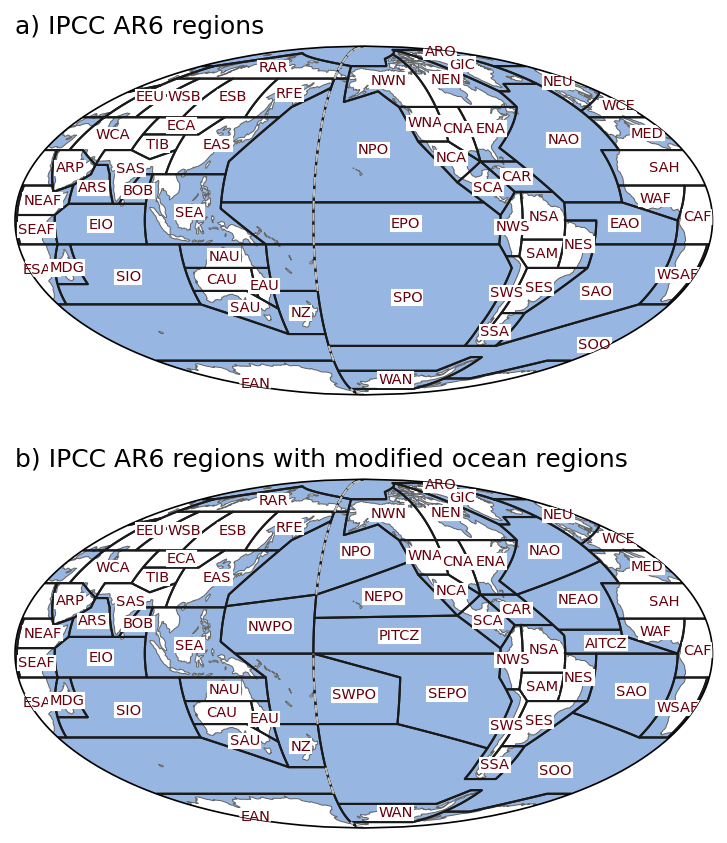

In [3]:
def Plot_AR6_map(ax, region):
    """
    INPUT
    region: regionmask variable
    OUTPUT
    ax
    """
    text_kws = dict(color="#67000d", fontsize=7, bbox=dict(pad=0.1, color="w"))   
    
    ax = region.plot(
        ax=ax,
        label="abbrev",
        add_ocean=True,
        line_kws=dict(linewidth=1),
        # coastlines=False,
        text_kws=text_kws,
    )
    if 'mod' in region.name:
        draw_line(ax, 180, 65, 180, 90)
        draw_line(ax, 180, 25, 180, 58)
        draw_line(ax, 180, -30, 180, 0)
        draw_line(ax, 180, -64, 180, -50)
        draw_line(ax, 180, -90, 180, -83)
    else:
        draw_line(ax, 180, 65, 180, 90)
        draw_line(ax, 180, -30, 180, 58)
        draw_line(ax, 180, -64, 180, -56)
        draw_line(ax, 180, -90, 180, -83)
      
    return ax
#--------------------------------------------------------------------------    

def draw_line(ax, lon1, lat1, lon2, lat2):
    for plat1 in range(lat1, lat2+1, 5):
        plat2 = plat1 + 5
        if plat2 > lat2: plat2 = lat2
        ax.plot([lon1, lon2], [plat1, plat2], color='silver', linewidth=1, linestyle='dashed', transform=ccrs.PlateCarree())
#--------------------------------------------------------------------------    

fig=plt.figure(figsize=(6,7.5),dpi=150)
proj=ccrs.Mollweide(central_longitude=206)

ax=fig.add_subplot(2,1,1, projection=proj)
ax = Plot_AR6_map(ax, ar6_all)
ax.set_title('a) IPCC AR6 regions', loc="left", fontsize=12)

ax=fig.add_subplot(2,1,2, projection=proj)
ax = Plot_AR6_map(ax, ar6_all_mod_ocn)
ax.set_title('b) IPCC AR6 regions with modified ocean regions', loc="left", fontsize=12)

plt.subplots_adjust(wspace=0.0, hspace=0.0)


In [4]:
# Convert Regionmask object to a geopandas GeoDataFrame
regions_gdf = ar6_all_mod_ocn.to_geodataframe()

# Save the GeoDataFrame as a shape file
regions_gdf.to_file("modified_ar6_regions_Ahn.et.al.2023.shp")


In [5]:
import geopandas as gp

# Read the shape file
regions_gp = gp.read_file("modified_ar6_regions_Ahn.et.al.2023.shp")
print(regions_gp)
regions_gp

# Convert to Regionmask
regions_rm = regionmask.from_geopandas(regions_gp,  names="names", abbrevs="abbrevs", name="AR6 reference regions with modified ocean regions")
print(regions_rm)
regions_rm


    numbers abbrevs               names  \
0         0     GIC   Greenland/Iceland   
1         1     NWN   N.W.North-America   
2         2     NEN   N.E.North-America   
3         3     WNA     W.North-America   
4         4     CNA     C.North-America   
..      ...     ...                 ...   
57       57     NAO    N.Atlantic-Ocean   
58       58    NEAO  N.E.Atlantic-Ocean   
59       59   AITCZ       Atlantic-ITCZ   
60       60     SAO    S.Atlantic-Ocean   
61       61     SOO      Southern-Ocean   

                                             geometry  
0   POLYGON ((-10.00000 62.00000, -10.43750 62.000...  
1   POLYGON ((-105.00000 50.00000, -105.43860 50.0...  
2   POLYGON ((-50.00000 50.00000, -50.44000 50.000...  
3   POLYGON ((-130.00000 50.00000, -129.56140 50.0...  
4   POLYGON ((-90.00000 50.00000, -90.00000 49.561...  
..                                                ...  
57  POLYGON ((-70.00000 25.00000, -77.00000 31.000...  
58  POLYGON ((-52.50000 10.00000, -

<regionmask.Regions 'AR6 reference regions with modified ocean regions'>
overlap:  False

Regions:
 0   GIC  Greenland/Iceland
 1   NWN  N.W.North-America
 2   NEN  N.E.North-America
 3   WNA    W.North-America
 4   CNA    C.North-America
..   ...                ...
57   NAO   N.Atlantic-Ocean
58  NEAO N.E.Atlantic-Ocean
59 AITCZ      Atlantic-ITCZ
60   SAO   S.Atlantic-Ocean
61   SOO     Southern-Ocean

[62 regions]

In [6]:
print(ar6_all_mod_ocn)
print(dir(ar6_all_mod_ocn))
print(ar6_all_mod_ocn.abbrevs)
print(ar6_all_mod_ocn.names)
# print(ar6_all_mod_ocn.coords)

print()

print(regions_rm)
print(dir(regions_rm))
print(regions_rm.abbrevs)
print(regions_rm.names)
# print(regions_rm.coords)


<regionmask.Regions 'AR6 reference regions with modified ocean regions'>
overlap:  None

Regions:
 0   GIC  Greenland/Iceland
 1   NWN  N.W.North-America
 2   NEN  N.E.North-America
 3   WNA    W.North-America
 4   CNA    C.North-America
..   ...                ...
57   NAO   N.Atlantic-Ocean
58  NEAO N.E.Atlantic-Ocean
59 AITCZ      Atlantic-ITCZ
60   SAO   S.Atlantic-Ocean
61   SOO     Southern-Ocean

[62 regions]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_display', 'abbrevs', 'bounds', 'bounds_global', 'centroids', 'combiner', 'coords', 'from_geodataframe', 'lon_180', 'lon_360', 'map_keys', 'mask', 'mask_3D', 'name', 'names', 'numbers', 'overlap',